In [13]:
import sys
sys.path.append('../')
import sqlite3
import json
from backtester import *
from fxcmtoken import major_forex_pairs
from sklearn.model_selection import train_test_split
from datetime import datetime

major_forex_pairs

['EUR/USD', 'GBP/USD', 'USD/JPY', 'USD/CHF', 'USD/CAD', 'AUD/USD', 'NZD/USD']

In [14]:
freq = 'm15'
conn = sqlite3.connect(f'../PriceData/PriceData_{freq}.db')
ticker = major_forex_pairs[6]
print(ticker)
data = pd.read_sql(f"SELECT * FROM '{ticker}'", conn, parse_dates=['date'], index_col=['date'])
conn.close()
columns = ['open', 'high', 'low', 'close']
for col in columns:
    data[col] = data[['bid'+col, 'ask'+col]].mean(axis=1)
# display(data.head())
# display(data.tail())
print(data.shape)
# display(data)
test_size = 0.048 # m15
# test_size = 0.143 # m5
test_len = int(test_size * len(data))
print("test length", test_len)
# train_data, test_data = train_test_split(data, test_size=test_size, shuffle=False)
# data = train_data
# data = test_data
# print(data.shape)
display(data)

NZD/USD
(10000, 13)
test length 480


,bidopen,bidclose,bidhigh,bidlow,askopen,askclose,askhigh,asklow,tickqty,open,high,low,close
date,,,,,,,,,,,,,
2021-07-20 09:30:00,0.69119,0.69141,0.69150,0.69074,0.69139,0.69160,0.69171,0.69094,1418,0.691290,0.691605,0.690840,0.691505
2021-07-20 09:45:00,0.69141,0.69050,0.69157,0.69034,0.69160,0.69069,0.69177,0.69053,1981,0.691505,0.691670,0.690435,0.690595
2021-07-20 10:00:00,0.69050,0.69061,0.69096,0.68977,0.69069,0.69080,0.69113,0.68996,2029,0.690595,0.691045,0.689865,0.690705
2021-07-20 10:15:00,0.69061,0.69050,0.69099,0.69002,0.69080,0.69071,0.69117,0.69020,1986,0.690705,0.691080,0.690110,0.690605
2021-07-20 10:30:00,0.69050,0.69062,0.69072,0.69019,0.69071,0.69080,0.69092,0.69037,1228,0.690605,0.690820,0.690280,0.690710
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-10 20:45:00,0.67948,0.67964,0.67969,0.67942,0.67968,0.67984,0.67990,0.67962,541,0.679580,0.679795,0.679520,0.679740
2021-12-10 21:00:00,0.67965,0.67971,0.67977,0.67958,0.67985,0.67991,0.67997,0.67978,391,0.679750,0.679870,0.679680,0.679810
2021-12-10 21:15:00,0.67970,0.67980,0.67981,0.67966,0.67989,0.68000,0.68004,0.67987,156,0.679795,0.679925,0.679765,0.679900


In [15]:
bb = ta.volatility.BollingerBands(close=data['close'], window=20, window_dev=3, fillna=False)
data['bb_high'] = bb.bollinger_hband()
data['bb_avg'] = bb.bollinger_mavg()
data['bb_low'] = bb.bollinger_lband()
data['bb_perc'] = bb.bollinger_pband()
data.dropna(inplace=True)
display(data.head())
print(data.shape)

,bidopen,bidclose,bidhigh,bidlow,askopen,askclose,askhigh,asklow,tickqty,open,high,low,close,bb_high,bb_avg,bb_low,bb_perc
date,,,,,,,,,,,,,,,,,
2021-07-20 14:15:00,0.69044,0.69101,0.69153,0.69042,0.69061,0.69119,0.69171,0.69060,2328,0.690525,0.691620,0.690510,0.691100,0.692691,0.690371,0.688051,0.657095
2021-07-20 14:30:00,0.69101,0.69036,0.69108,0.69009,0.69119,0.69056,0.69126,0.69027,2755,0.691100,0.691170,0.690180,0.690460,0.692506,0.690319,0.688132,0.532290
2021-07-20 14:45:00,0.69036,0.69015,0.69050,0.68952,0.69056,0.69032,0.69067,0.68972,2816,0.690460,0.690585,0.689620,0.690235,0.692480,0.690301,0.688121,0.484916
2021-07-20 15:00:00,0.69015,0.69005,0.69021,0.68971,0.69032,0.69025,0.69038,0.68990,1887,0.690235,0.690295,0.689805,0.690150,0.692436,0.690273,0.688110,0.471570
2021-07-20 15:15:00,0.69005,0.68999,0.69061,0.68994,0.69025,0.69020,0.69080,0.69014,1409,0.690150,0.690705,0.690040,0.690095,0.692401,0.690248,0.688094,0.464596


(9981, 17)


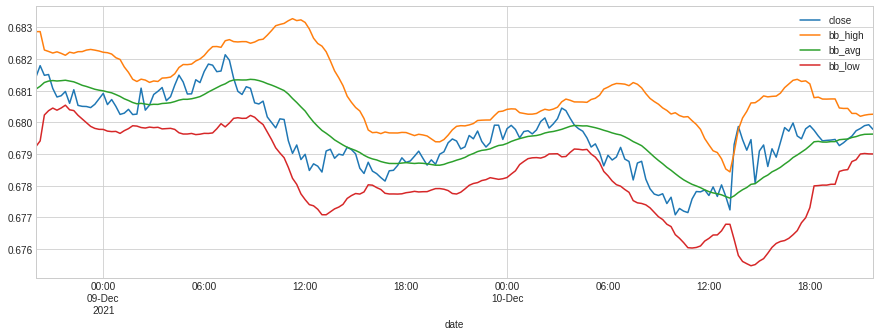

In [16]:
data[['close', 'bb_high', 'bb_avg', 'bb_low']].iloc[-200:].plot(figsize=(15,5))
plt.show()

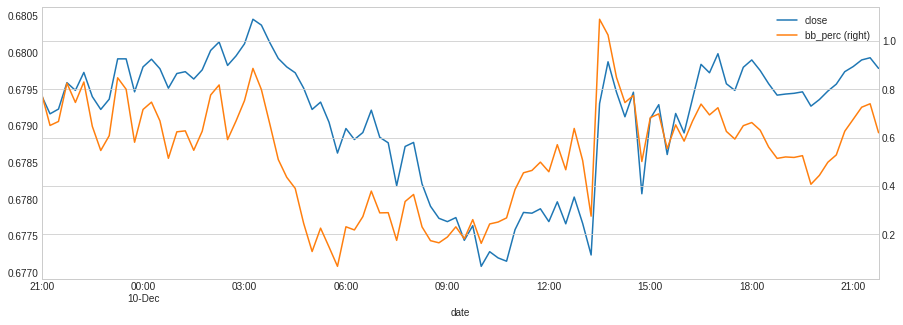

In [17]:
data[['close', 'bb_perc']].iloc[-100:].plot(figsize=(15,5), secondary_y='bb_perc')
plt.show()

In [18]:
data['bb_perc'].describe()

count    9981.000000
mean        0.498435
std         0.222056
min        -0.159065
25%         0.321752
50%         0.500527
75%         0.672781
max         1.169887
Name: bb_perc, dtype: float64

In [19]:
data['distance'] = data['close'] - data['bb_avg']
data['bb_signal'] = np.where(data['close'] <= data['bb_low'], 1,
                             np.where(data['close'] >= data['bb_high'], -1, 
                                      np.where(data['distance']*data['distance'].shift(1)<0, 0, 0)))
data['bb_signal'] = data['bb_signal'].ffill().fillna(0)

In [20]:
print('Positions')
print(data['bb_signal'].value_counts())
print('-'*50)
print('Positions change')
print(data['bb_signal'].diff(1).apply(np.abs).value_counts())

Positions
 0    9866
 1      63
-1      52
Name: bb_signal, dtype: int64
--------------------------------------------------
Positions change
0.0    9794
1.0     186
Name: bb_signal, dtype: int64


  0%|          | 0/9980 [00:00<?, ?it/s]

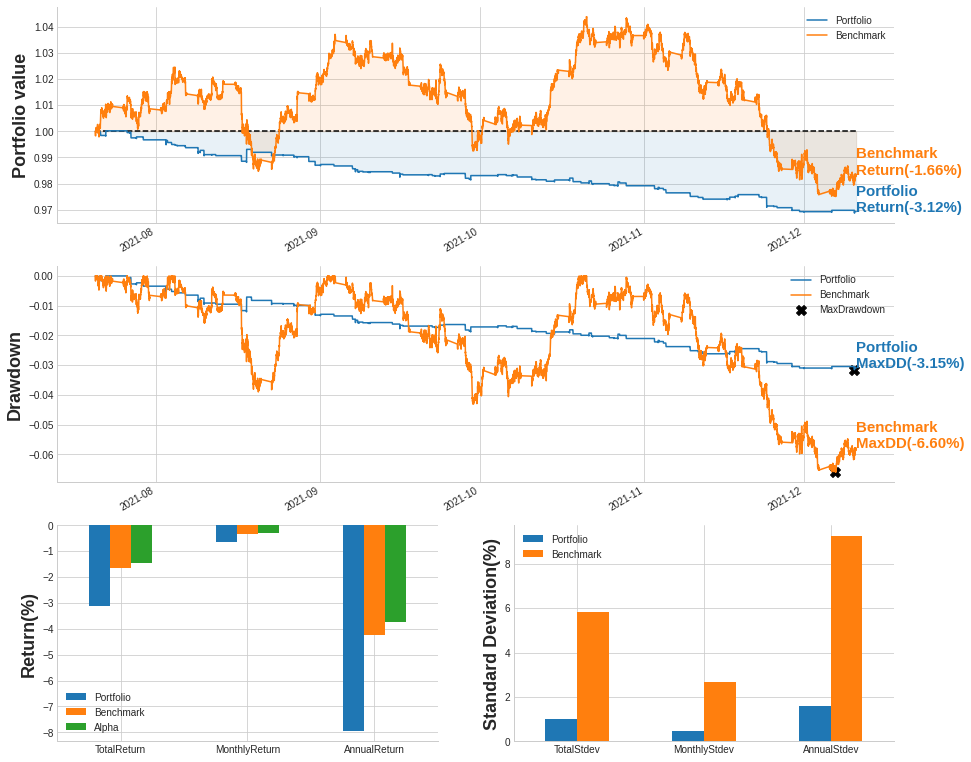

----------------------------------------------------------------------
Data length: |143 days 07:30:00|
Data range from |2021-07-20 14:15:00| to |2021-12-10 21:45:00|
----------------------------------------------------------------------
***** Portfolio Returns in percentage(%) *****
╒═══════════════╤═════════════╤═════════════╤═════════╕
│               │   Portfolio │   Benchmark │   Alpha │
╞═══════════════╪═════════════╪═════════════╪═════════╡
│ TotalReturn   │      -3.122 │      -1.659 │  -1.463 │
├───────────────┼─────────────┼─────────────┼─────────┤
│ MonthlyReturn │      -0.653 │      -0.347 │  -0.306 │
├───────────────┼─────────────┼─────────────┼─────────┤
│ AnnualReturn  │      -7.951 │      -4.225 │  -3.726 │
╘═══════════════╧═════════════╧═════════════╧═════════╛
***** Portfolio Standard Deviation in percentage(%) *****
╒══════════════╤═════════════╤═════════════╕
│              │   Portfolio │   Benchmark │
╞══════════════╪═════════════╪═════════════╡
│ TotalStdev   │  

In [21]:
backtest = IterativeBacktester(data, data['bb_signal'], freq)
backtest.backtest()
backtest.results()